In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,12))
plt.style.use('seaborn')

In [2]:
from jupyterworkflow.data import get_data

In [3]:
data = get_data()
data.head()

,West,East,Total
Date,,,
2014-12-01,23689,24818,48507
2012-11-01,26062,24585,50647
2012-12-01,18608,17761,36369
2015-01-01,35754,24876,60630
2017-12-01,18946,26916,45862


In [4]:
#from urllib.request import urlretrieve
#urlretrieve(URL,'Fremont.csv')

In [5]:
#import pandas as pd 
#data = pd.read_csv('Fremont.csv')
#data.head()

In [6]:
#import pandas as pd 
#data = pd.read_csv('Fremont.csv', index_col= 'Date', parse_dates = True)


In [7]:
data.describe()

,West,East,Total
count,67.000000,67.000000,67.000000
mean,39697.537313,40250.940299,79948.477612
std,15467.539714,13602.164659,27052.271370
min,17385.000000,17761.000000,36369.000000
25%,27892.500000,28802.500000,58171.500000
50%,36440.000000,38507.000000,79947.000000
75%,51008.000000,52135.500000,105116.000000
max,107801.000000,70421.000000,154624.000000


In [8]:
data.count()

West     67
East     67
Total    67
dtype: int64

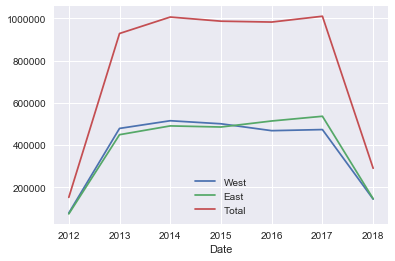

In [9]:
data.resample('Y').sum().plot()

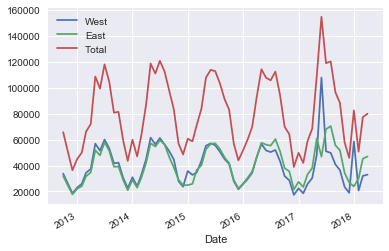

In [10]:

#data.resample('W').sum().plot()
plt.figure(figsize=(10,12))
data.plot()


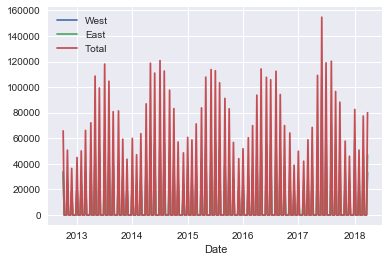

In [11]:
data.resample('W').sum().plot()

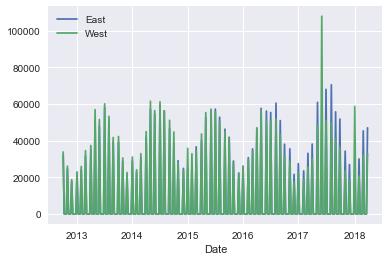

In [12]:
plt.subplots()
data['East'].resample('W').sum().plot(legend=True)
data['West'].resample('W').sum().plot(legend = True)

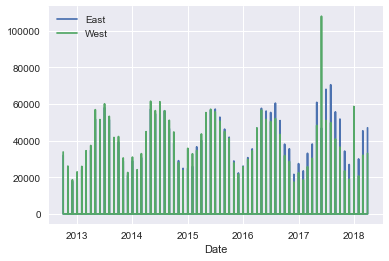

In [13]:
plt.subplots()
data['East'].resample('H').sum().plot(legend=True)
data['West'].resample('H').sum().plot(legend = True)

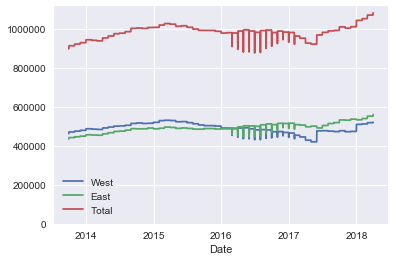

In [14]:
data['Total'] = data['West'] + data['East']
ax = data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

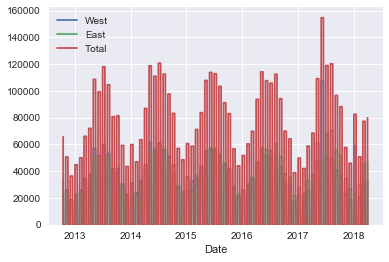

In [25]:
data['Total'] = data['West'] + data['East']
ax = data.resample('H').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

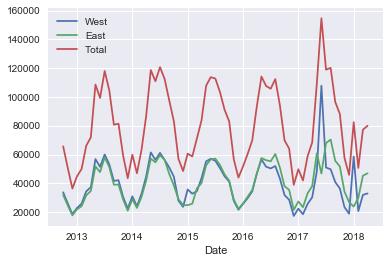

In [15]:
data.groupby(data.index).mean().plot()

In [16]:
pivoted = data.pivot_table('Total',index=data.index.time, columns=data.index.date)
pivoted.iloc[:10,:5]

,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01
00:00:00,65695,50647,36369,44884,50027


In [17]:
pivoted.plot(legend = False)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000022EC21EA158> (for post_execute):


ValueError: microsecond must be in 0..999999

ValueError: microsecond must be in 0..999999

In [18]:
pivoted.index[:24]

Index([00:00:00], dtype='object')

In [19]:
data.index

DatetimeIndex(['2014-12-01', '2012-11-01', '2012-12-01', '2015-01-01',
               '2017-12-01', '2017-07-01', '2017-05-01', '2013-03-01',
               '2016-07-01', '2013-10-01', '2016-05-01', '2014-07-01',
               '2014-01-01', '2016-12-01', '2016-04-01', '2018-03-01',
               '2017-11-01', '2017-08-01', '2017-01-01', '2016-06-01',
               '2017-04-01', '2013-08-01', '2013-04-01', '2015-11-01',
               '2013-01-01', '2013-12-01', '2015-03-01', '2014-10-01',
               '2017-06-01', '2015-12-01', '2013-05-01', '2014-04-01',
               '2014-11-01', '2014-09-01', '2015-09-01', '2014-02-01',
               '2016-01-01', '2016-11-01', '2017-02-01', '2014-03-01',
               '2018-04-01', '2017-09-01', '2013-11-01', '2013-06-01',
               '2015-02-01', '2014-06-01', '2014-05-01', '2012-10-01',
               '2015-05-01', '2018-01-01', '2018-02-01', '2016-10-01',
               '2017-10-01', '2013-09-01', '2016-02-01', '2016-08-01',
      

In [20]:
import numpy as np
np.unique(data.index)

array(['2012-10-01T00:00:00.000000000', '2012-11-01T00:00:00.000000000',
       '2012-12-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-02-01T00:00:00.000000000', '2013-03-01T00:00:00.000000000',
       '2013-04-01T00:00:00.000000000', '2013-05-01T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-07-01T00:00:00.000000000',
       '2013-08-01T00:00:00.000000000', '2013-09-01T00:00:00.000000000',
       '2013-10-01T00:00:00.000000000', '2013-11-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2014-02-01T00:00:00.000000000', '2014-03-01T00:00:00.000000000',
       '2014-04-01T00:00:00.000000000', '2014-05-01T00:00:00.000000000',
       '2014-06-01T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-08-01T00:00:00.000000000', '2014-09-01T00:00:00.000000000',
       '2014-10-01T00:00:00.000000000', '2014-11-01T00:00:00.000000000',
       '2014-12-01T00:00:00.000000000', '2015-01-01